**Multi-Class Prediction of Obesity Risk**

Avdeev Roman

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [273]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Data

In [274]:
df_train.shape

(20758, 18)

In [275]:
df_test.shape

(13840, 17)

In [276]:
df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


Оценим признаки. Рассмотрим их типы для формирования подмножеств категориальных/численных фичей

а также проверим наличие пропусков

In [277]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

Статистики данных:

In [278]:
df_train.describe(include='all')

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,20758.00000,20758,20758.000000,20758.000000,20758.000000,20758,20758,20758.000000,20758.000000,20758,20758,20758.000000,20758,20758.000000,20758.000000,20758,20758,20758
unique,NaN,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,3,5,7
top,NaN,Female,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_III
freq,NaN,10422,NaN,NaN,NaN,17014,18982,NaN,NaN,17529,20513,NaN,20071,NaN,NaN,15066,16687,4046
mean,10378.50000,NaN,23.841804,1.700245,87.887768,NaN,NaN,2.445908,2.761332,NaN,NaN,2.029418,NaN,0.981747,0.616756,NaN,NaN,NaN
std,5992.46278,NaN,5.688072,0.087312,26.379443,NaN,NaN,0.533218,0.705375,NaN,NaN,0.608467,NaN,0.838302,0.602113,NaN,NaN,NaN
min,0.00000,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,5189.25000,NaN,20.000000,1.631856,66.000000,NaN,NaN,2.000000,3.000000,NaN,NaN,1.792022,NaN,0.008013,0.000000,NaN,NaN,NaN
50%,10378.50000,NaN,22.815416,1.700000,84.064875,NaN,NaN,2.393837,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.573887,NaN,NaN,NaN
75%,15567.75000,NaN,26.000000,1.762887,111.600553,NaN,NaN,3.000000,3.000000,NaN,NaN,2.549617,NaN,1.587406,1.000000,NaN,NaN,NaN


Оценим таргет:

In [279]:
df_train.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

Получили довольно равномерное распредеоление категорий в таргете

### Категориальные/численные признаки

In [280]:
numerical, categorical = [], []

df_dtypes = pd.DataFrame({'column': df_train.dtypes.index, 'type': df_train.dtypes.values})

for i in range(df_dtypes.shape[0]):
    if df_dtypes.at[i, 'type'] == 'object':
        categorical.append(df_dtypes.at[i, 'column'])
    else:
        numerical.append(df_dtypes.at[i, 'column'])
        
numerical.remove('id')

In [281]:
print('Численные признаки: ', numerical)
print('Категориальные признаки: ', categorical)

Численные признаки:  ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Категориальные признаки:  ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


#### Численные признаки

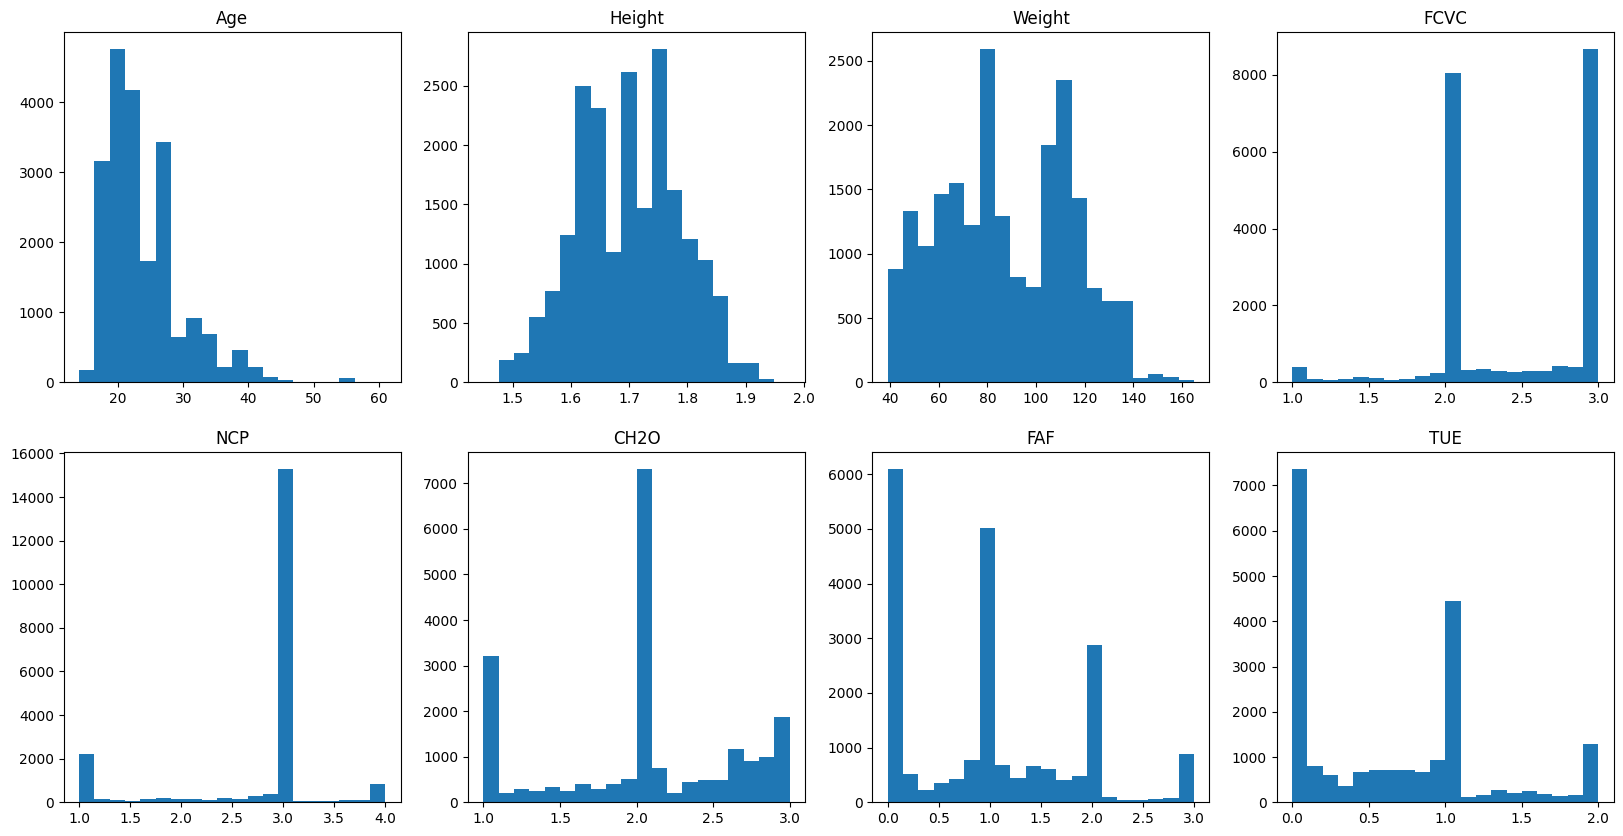

In [282]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, feature in enumerate(numerical):
    axes[i // 4, i % 4].hist(df_train[feature], bins=20)
    axes[i // 4, i % 4].set_title(feature)

#### Категориальные признаки + Таргет

Посмотрим на долю каждой категории в каждом признаке:

In [283]:
for feature in categorical:
    print(df_train[feature].value_counts() / df_train.shape[0])
    print('-----------------------------------')

Gender
Female    0.502071
Male      0.497929
Name: count, dtype: float64
-----------------------------------
family_history_with_overweight
yes    0.819636
no     0.180364
Name: count, dtype: float64
-----------------------------------
FAVC
yes    0.914443
no     0.085557
Name: count, dtype: float64
-----------------------------------
CAEC
Sometimes     0.844446
Frequently    0.119087
Always        0.023027
no            0.013441
Name: count, dtype: float64
-----------------------------------
SMOKE
no     0.988197
yes    0.011803
Name: count, dtype: float64
-----------------------------------
SCC
no     0.966904
yes    0.033096
Name: count, dtype: float64
-----------------------------------
CALC
Sometimes     0.725792
no            0.248723
Frequently    0.025484
Name: count, dtype: float64
-----------------------------------
MTRANS
Public_Transportation    0.803883
Automobile               0.170248
Walking                  0.022497
Motorbike                0.001831
Bike               

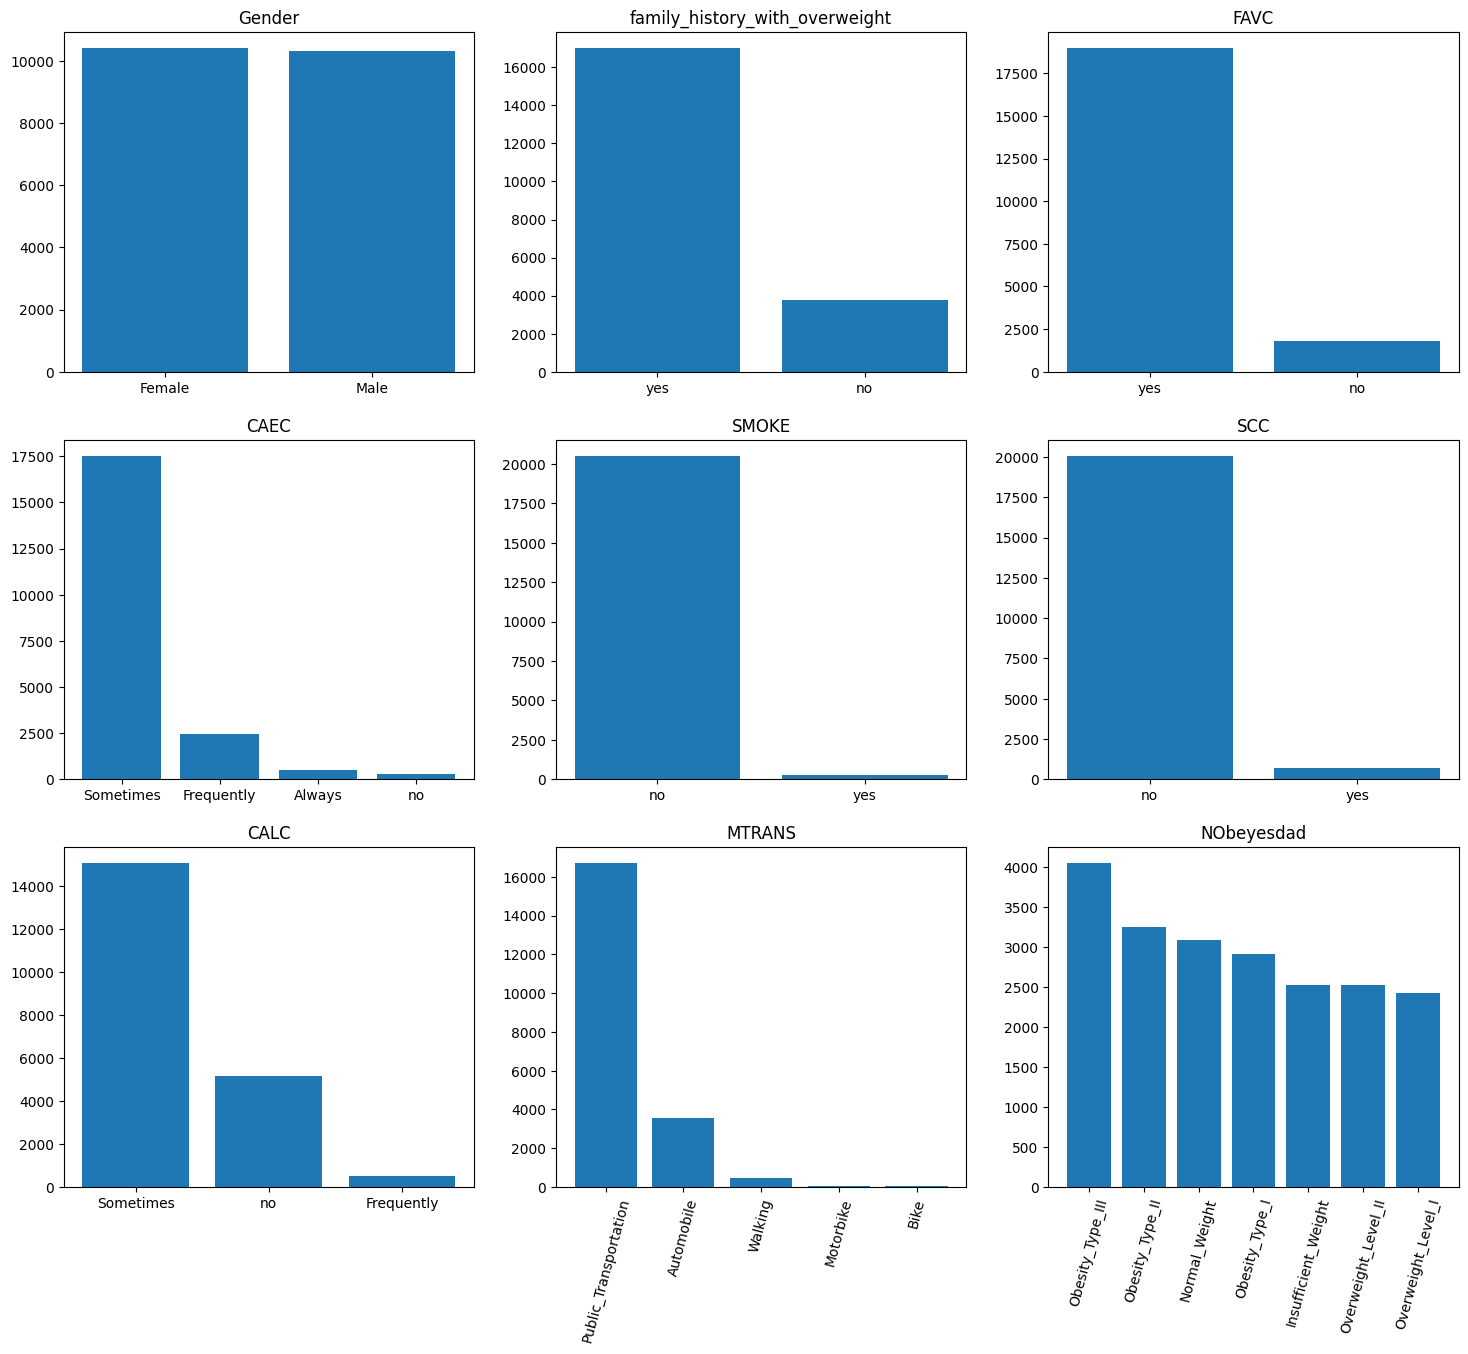

In [284]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

for i, feature in enumerate(categorical):
    axes[i // 3, i % 3].bar(df_train[feature].value_counts().index, df_train[feature].value_counts().values)
    axes[i // 3, i % 3].set_title(feature)
    if i in [7, 8]:
        axes[i // 3, i % 3].set_xticklabels(list(df_train[feature].value_counts().index), rotation=75)

В признаке MTRANS катеории Motorbike и Bike являются крайне редкими + совпадают по смыслу. Объединим их в одну категорию

In [285]:
categorical.remove('NObeyesdad')

## Feature engineering

In [286]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import rare_values as ra

from sklearn.model_selection import train_test_split

Протестиируем объединение в единую группу редких категорий в признаке:

In [287]:
enc = ra.GroupingRareValues(cols=['MTRANS'], threshold=0.01).fit(df_train)

In [288]:
enc.mapping

[{'col': 'MTRANS',
  'mapping': Public_Transportation    Public_Transportation
  Automobile                          Automobile
  Walking                                Walking
  Motorbike                                 rare
  Bike                                      rare
  dtype: object,
  'data_type': dtype('O')}]

In [289]:
data2 = enc.transform(df_train)
data2.MTRANS.value_counts()

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
rare                        70
Name: count, dtype: int64

Теперь напишем пайпланы для численных и категориальных признаков:

In [290]:
std_scaler = StandardScaler()
ord_encoder = OrdinalEncoder()
enc = ra.GroupingRareValues(cols=['MTRANS'], threshold=0.01)

In [291]:
pipe_num = Pipeline([('scaler', std_scaler)])

pipe_cat = Pipeline([('rare_vals', enc), ('encoder', ord_encoder)])

col_transformer = ColumnTransformer([('num_preproc', pipe_num, numerical),
                                     ('cat_preproc', pipe_cat, categorical)])

In [292]:
df_train.drop('id', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df_train.drop('NObeyesdad', axis=1), df_train['NObeyesdad'], test_size=0.3, random_state=42)

In [293]:
X_train_transformed = col_transformer.fit_transform(X_train)
X_test_transformed = col_transformer.transform(X_test)

ord_encoder_target = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

y_train_transformed = ord_encoder_target.fit_transform(y_train.to_frame()).flatten()
y_test_transformed = ord_encoder_target.transform(y_test.to_frame()).flatten()

## Baseline

In [294]:
! pip install catboost xgboost

In [295]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

**Случайный лес:**

In [296]:
clf = RandomForestClassifier()
clf.fit(X_train_transformed, y_train_transformed)

RandomForestClassifier()

In [297]:
y_pred = clf.predict(X_test_transformed)

print('accuracy=', accuracy_score(y_pred, y_test_transformed))

accuracy= 0.8962748876043674


**Градиентный бустинг:**

In [298]:
clf = XGBClassifier()
clf.fit(X_train_transformed, y_train_transformed)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [299]:
y_pred = clf.predict(X_test_transformed)

print('accuracy=', accuracy_score(y_pred, y_test_transformed))

accuracy= 0.9018946692357097


In [300]:
clf = CatBoostClassifier()
clf.fit(X_train_transformed, y_train_transformed)

Learning rate set to 0.090698
0:	learn: 1.6482064	total: 158ms	remaining: 2m 37s
1:	learn: 1.4595795	total: 170ms	remaining: 1m 24s
2:	learn: 1.3163752	total: 182ms	remaining: 1m
3:	learn: 1.2051601	total: 195ms	remaining: 48.5s
4:	learn: 1.1190404	total: 208ms	remaining: 41.5s
5:	learn: 1.0416698	total: 221ms	remaining: 36.5s
6:	learn: 0.9772003	total: 235ms	remaining: 33.3s
7:	learn: 0.9206497	total: 248ms	remaining: 30.8s
8:	learn: 0.8711460	total: 262ms	remaining: 28.9s
9:	learn: 0.8285361	total: 277ms	remaining: 27.4s
10:	learn: 0.7904159	total: 293ms	remaining: 26.3s
11:	learn: 0.7573379	total: 305ms	remaining: 25.1s
12:	learn: 0.7255515	total: 318ms	remaining: 24.2s
13:	learn: 0.6987668	total: 331ms	remaining: 23.3s
14:	learn: 0.6724533	total: 345ms	remaining: 22.6s
15:	learn: 0.6486694	total: 357ms	remaining: 21.9s
16:	learn: 0.6270389	total: 370ms	remaining: 21.4s
17:	learn: 0.6091265	total: 385ms	remaining: 21s
18:	learn: 0.5926933	total: 398ms	remaining: 20.6s
19:	learn: 0.5

In [301]:
y_pred = clf.predict(X_test_transformed)

print('accuracy=', accuracy_score(y_pred, y_test_transformed))

accuracy= 0.9026974951830443


#### Prediction

In [241]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [242]:
df_test.head(2)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.0,Sometimes,no,2.825629,no,0.8554,0.0,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.0,Sometimes,no,3.000000,no,1.0000,0.0,Sometimes,Public_Transportation


In [243]:
print('Размер тестового набора:', df_test.shape[0])

Размер тестового набора: 13840


In [244]:
std_scaler = StandardScaler()
ord_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
enc = ra.GroupingRareValues(cols=['MTRANS'], threshold=0.01)

pipe_num = Pipeline([('scaler', std_scaler)])
pipe_cat = Pipeline([('rare_vals', enc), ('encoder', ord_encoder)])

col_transformer = ColumnTransformer([('num_preproc', pipe_num, numerical),
                                     ('cat_preproc', pipe_cat, categorical)])

In [245]:
target = df_train['NObeyesdad']
df_train.drop(columns=['id', 'NObeyesdad'], axis=1, inplace=True)

df_train_transformed = col_transformer.fit_transform(df_train)

In [246]:
ord_encoder_target = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

target_transformed = ord_encoder_target.fit_transform(target.to_frame()).flatten()

In [247]:
df_test.drop('id', axis=1, inplace=True)

df_test_transformed = col_transformer.transform(df_test)

In [248]:
clf = XGBClassifier()
clf.fit(df_train_transformed, target_transformed)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [250]:
preds = clf.predict(df_test_transformed)
preds_out = ord_encoder_target.inverse_transform(preds.reshape(-1, 1))

In [268]:
preds_df = pd.DataFrame({'id': np.arange(20758, 20758+df_test.shape[0]), 'NObeyesdad': preds_out.flatten()}, index=None)

In [271]:
preds_df.to_csv('preds.csv', index=False)

## Strong model